# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
import numpy as np
from types import SimpleNamespace
from inauguralproject import HouseholdSpecializationModelClass
import pandas as pd
import matplotlib.pyplot as plt
##
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

# Question 1

**Explain how you solve the model**

In [3]:
# code for solving the model (remember documentation and comments)

model = HouseholdSpecializationModelClass()

#a. Create list with values of alpha and sigma
alpha_list = [0.25, 0.5, 0.75]
sigma_list = [0.5,1.0,1.5]

df = pd.DataFrame(columns = pd.Index(alpha_list, name="sigma/alpha"), index = pd.Index(sigma_list, name=""))


for i in alpha_list:
    for j in sigma_list:
        model.par.alpha = i
        model.par.sigma = j
        results = model.solve_discrete()
        ratio = results.HF / results.HM
        df.loc[j,i] = f"{ratio:.2f}"

print(df)



/Users/philipgadereumert/Desktop/Uni/Introduction to Programming and Numerical Analysis/projects-2023-philx2-nico/inauguralproject/inauguralproject.py:69: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


sigma/alpha  0.25  0.50  0.75
                             
0.5          0.55  1.00  1.83
1.0          0.31  1.00  3.25
1.5          0.21  1.00  4.67


# Question 2

The code then specifies a list of values for the parameters $\alpha$, $\sigma$, and $w_{F}$ that will be used to solve the model for a range of different parameter values. The results_list variable is initialized as an empty list.

The code then runs three nested loops over the parameter values. For each set of parameter values, the code modifies the alpha, sigma, and $w_{F}$ parameters of the model instance to match the current values of $\alpha$, $\sigma$, and $w_{F}$. It then solves the model using the solve_discrete() method of the model instance.

The ratio variable is then computed as the ratio of the female home production to male home production. This ratio is added, along with the current values of $\alpha$, $\sigma$, and $w_{F}$, to the results_list variable.

After all iterations of the loops have completed, the code plots the results. For each combination of alpha and sigma, a different linestyle is used, while for each sigma value, a different marker is used. The x-axis represents the logarithm of the ratio of female to male market wages $\frac{w_{F}}{w_{M}}$, while the y-axis represents the logarithm of the ratio of female to male home production $\frac{H_{F}}{H_{M}}$. The legend indicates the values of $\alpha$ and $\sigma$ for each line.

Runtime is approx. 16 seconds

/Users/philipgadereumert/Desktop/Uni/Introduction to Programming and Numerical Analysis/projects-2023-philx2-nico/inauguralproject/inauguralproject.py:69: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


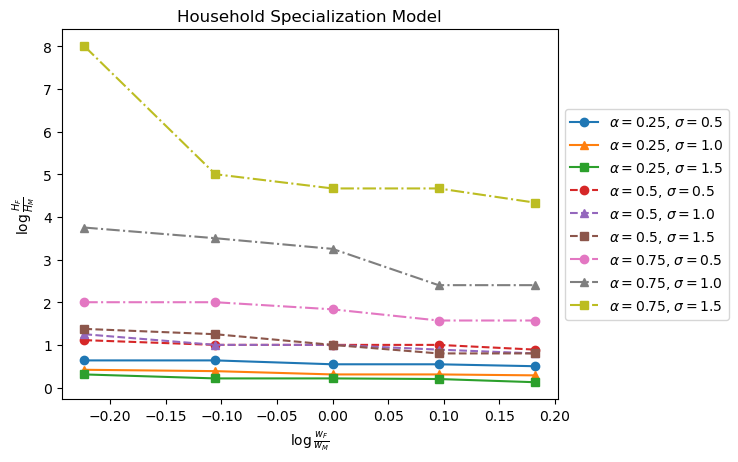

In [4]:
model = HouseholdSpecializationModelClass()

alpha_list = [0.25, 0.5, 0.75]
sigma_list = [0.5, 1.0, 1.5]
wF_list = [0.8, 0.9, 1.0, 1.1, 1.2]

results_list = []

for alpha in alpha_list:
    for sigma in sigma_list:
        for wF in wF_list:
            # Modify the values of alpha, sigma, and wF in the model
            model.par.alpha = alpha
            model.par.sigma = sigma
            model.par.wF = wF
            
            # Solve the model
            results = model.solve_discrete()
            ratio = results.HF / results.HM
            
            results_list.append((alpha, sigma, wF, ratio))

# Plot the results
markers = ['o', '^', 's', 'd', 'x']
styles = ['-', '--', '-.', ':']
for i, alpha in enumerate(alpha_list):
    for j, sigma in enumerate(sigma_list):
        mask = [(r[0]==alpha) and (r[1]==sigma) for r in results_list]
        wF_arr, ratio_arr = zip(*[r[2:] for r in np.array(results_list)[mask]])
        plt.plot(np.log(np.array(wF_arr)/model.par.wM), ratio_arr, marker=markers[j], linestyle=styles[i], label=f'$\\alpha={alpha}$, $\\sigma={sigma}$')

plt.xlabel('$\\log\\frac{w_F}{w_M}$')
plt.ylabel('$\\log\\frac{H_F}{H_M}$')
plt.title('Household Specialization Model')

# Create a separate legend outside of the plot area
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

# Question 3

This part does the same as in question 2 but it solves the model by using solve() as opposed to solve_discrete(). 

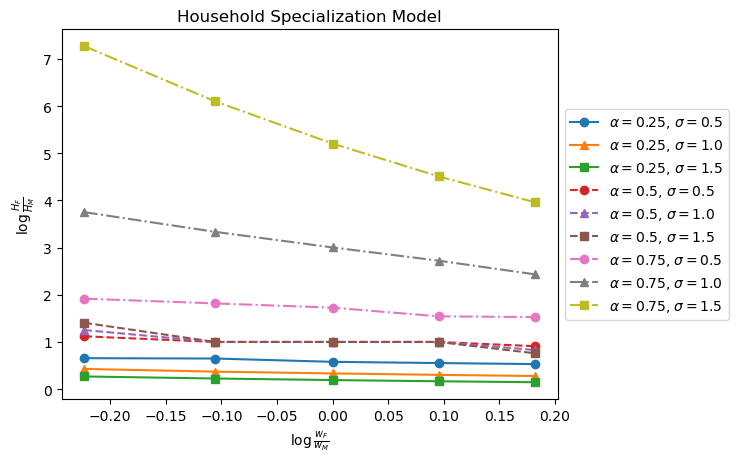

In [5]:
model = HouseholdSpecializationModelClass()

alpha_list = [0.25, 0.5, 0.75]
sigma_list = [0.5, 1.0, 1.5]
wF_list = [0.8, 0.9, 1.0, 1.1, 1.2]

results_list = []

for alpha in alpha_list:
    for sigma in sigma_list:
        for wF in wF_list:
            # Modify the values of alpha, sigma, and wF in the model
            model.par.alpha = alpha
            model.par.sigma = sigma
            model.par.wF = wF
            
            # Solve the model
            results = model.solve()
            ratio = results.HF / results.HM
            
            results_list.append((alpha, sigma, wF, ratio))

# Plot the results
markers = ['o', '^', 's', 'd', 'x']
styles = ['-', '--', '-.', ':']
for i, alpha in enumerate(alpha_list):
    for j, sigma in enumerate(sigma_list):
        mask = [(r[0]==alpha) and (r[1]==sigma) for r in results_list]
        wF_arr, ratio_arr = zip(*[r[2:] for r in np.array(results_list)[mask]])
        plt.plot(np.log(np.array(wF_arr)/model.par.wM), ratio_arr, marker=markers[j], linestyle=styles[i], label=f'$\\alpha={alpha}$, $\\sigma={sigma}$')

plt.xlabel('$\\log\\frac{w_F}{w_M}$')
plt.ylabel('$\\log\\frac{H_F}{H_M}$')
plt.title('Household Specialization Model')

# Create a separate legend outside of the plot area
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

Opgave 4

In [11]:
model = HouseholdSpecializationModelClass()
model.run_regression()


'╒═════════╤═════════╤═════════╤═════════╤════════╕\n│   Alpha │   Sigma │   Beta0 │   Beta1 │    SSE │\n╞═════════╪═════════╪═════════╪═════════╪════════╡\n│  0.2500 │  0.5000 │ -0.5311 │ -0.5747 │ 0.0021 │\n├─────────┼─────────┼─────────┼─────────┼────────┤\n│  0.2500 │  1.0000 │ -1.0941 │ -1.0592 │ 0.0003 │\n├─────────┼─────────┼─────────┼─────────┼────────┤\n│  0.2500 │  1.5000 │ -1.6495 │ -1.4969 │ 0.0000 │\n├─────────┼─────────┼─────────┼─────────┼────────┤\n│  0.5000 │  0.5000 │ -0.0002 │ -0.4117 │ 0.0042 │\n├─────────┼─────────┼─────────┼─────────┼────────┤\n│  0.5000 │  1.0000 │ -0.0006 │ -0.8170 │ 0.0167 │\n├─────────┼─────────┼─────────┼─────────┼────────┤\n│  0.5000 │  1.5000 │  0.0006 │ -1.2240 │ 0.0376 │\n├─────────┼─────────┼─────────┼─────────┼────────┤\n│  0.7500 │  0.5000 │  0.5246 │ -0.6101 │ 0.0018 │\n├─────────┼─────────┼─────────┼─────────┼────────┤\n│  0.7500 │  1.0000 │  1.0929 │ -1.0536 │ 0.0003 │\n├─────────┼─────────┼─────────┼─────────┼────────┤\n│  0.7500 │